<a href="https://colab.research.google.com/github/PKpacheco/nn_assign6_emotion_class/blob/main/assignment_6_NN_group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: Emotion Classification


Group 8:
* Paola Katherine Pacheco
* Wai Ping Kwok
* Xueyao Wang

# **Objective**:
To create a model that can identify the emotion (joy, sadness, anger or fear) of a tweet.

## **Data**:
The dataset is available at Emotion Classification NLP | Kaggle . Acknowledgment: WASSA-2017 Shared Task on Emotion Intensity. Saif M. Mohammad and Felipe Bravo-Marquez. In Proceedings of the EMNLP 2017 Workshop on Computational Approaches to Subjectivity, Sentiment, and Social Media (WASSA), September 2017, Copenhagen, Denmark.

## **Problem Statement**:
Identifying the emotion behind human text is an important part of NLP for various applications including customer review analysis and artificial intelligence. The owner of Twitter, Elon Musk has fired everyone who understood emotion classification of tweets because they were not "hard core" enough, and now their existing model is no longer working. As a new employee, your job is to develop a model that can classify the emotional connotation behind tweets. Mr. Musk does not disclose why this is needed but laughs eerily whenever asked about it.

# Data

## a) Load the three datafiles into training, validation, and testing dataframes.


In [1]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=e30f5fbdecfc905c328fdfee4e7c0b1ea3107a5cc291861c027046aa8de499b4
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [2]:
# import libraries

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
import seaborn as sns

from autocorrect import Speller

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Embedding,
    LSTM,
    Dropout,
    Dense
    )

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
url_labels_test = 'https://raw.githubusercontent.com/PKpacheco/nn_assign6_emotion_class/main/emotion-labels-test.csv'

url_labels_train = 'https://raw.githubusercontent.com/PKpacheco/nn_assign6_emotion_class/main/emotion-labels-train.csv'

url_labels_val = 'https://raw.githubusercontent.com/PKpacheco/nn_assign6_emotion_class/main/emotion-labels-val.csv'

In [4]:
test_df = pd.read_csv (url_labels_test )
train_df = pd.read_csv(url_labels_train)
val_df = pd.read_csv(url_labels_val)

In [5]:
test_df.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [6]:
train_df.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [7]:
val_df.head()

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",joy
1,Nawaz Sharif is getting more funnier than @kap...,joy
2,Nawaz Sharif is getting more funnier than @kap...,joy
3,@tomderivan73 😁...I'll just people watch and e...,joy
4,I love my family so much #lucky #grateful #sma...,joy


## b)Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. Use pandas.DataFrame.duplicates to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done.


In [8]:
# Check data types and missing values for test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3142 non-null   object
 1   label   3142 non-null   object
dtypes: object(2)
memory usage: 49.2+ KB


In [9]:
# Check data types and missing values for train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


In [10]:
# Check data types and missing values for val_df
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    347 non-null    object
 1   label   347 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [11]:
# Calculate the sum of missing values in test_df
missing_values_test = test_df.isnull().sum().sum()
print("Total missing values in test_df:", missing_values_test)

Total missing values in test_df: 0


In [12]:
# Calculate the sum of missing values in train_df
missing_values_train = train_df.isnull().sum().sum()
print("Total missing values in train_df:", missing_values_train)


Total missing values in train_df: 0


In [13]:
# Calculate the sum of missing values in val_df
missing_values_val = val_df.isnull().sum().sum()
print("Total missing values in val_df:", missing_values_val)

Total missing values in val_df: 0


In [14]:
# Calculate the sum of NaN values in test_df
nan_sum_test = test_df.isna().sum().sum()
print("Total sum of NaN values in test_df:", nan_sum_test)

# Calculate the sum of NaN values in train_df
nan_sum_train = train_df.isna().sum().sum()
print("Total sum of NaN values in train_df:", nan_sum_train)

# Calculate the sum of NaN values in val_df
nan_sum_val = val_df.isna().sum().sum()
print("Total sum of NaN values in val_df:", nan_sum_val)


Total sum of NaN values in test_df: 0
Total sum of NaN values in train_df: 0
Total sum of NaN values in val_df: 0


## c)Move the labels into a separate dataframe and use sklearn.preprocessing.LabelEncoder to convert the string labels into integers. Reshape the labels into a 2d array. Determine which number has been assigned to each label and record this information in markdown.


In [15]:
test_labels_df = pd.DataFrame()
train_labels_df = pd.DataFrame()
validation_labels_df = pd.DataFrame()

In [16]:

label_encoder = LabelEncoder()

# Convert string labels into integers for each dataset
test_labels_df['test_labels'] = label_encoder.fit_transform(test_df['label'])
train_labels_df['train_labels'] = label_encoder.transform(train_df['label'])
validation_labels_df['val_labels'] = label_encoder.transform(val_df['label'])

# Reshape the labels into 2D arrays for each dataset
labels_test = test_labels_df['test_labels'].values.reshape(-1, 1)
labels_train = train_labels_df['train_labels'].values.reshape(-1, 1)
labels_val = validation_labels_df['val_labels'].values.reshape(-1, 1)


In [17]:
labels_val

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
    

## d)Create a bar plot using seaborn.barplot of the number of elements in each category over the entire dataset. Use markdown to comment on how well balanced the dataset is.


<ipython-input-18-63718194ae38>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=all_labels, x=all_labels.columns[0], y=all_labels.columns[0], ci=None)


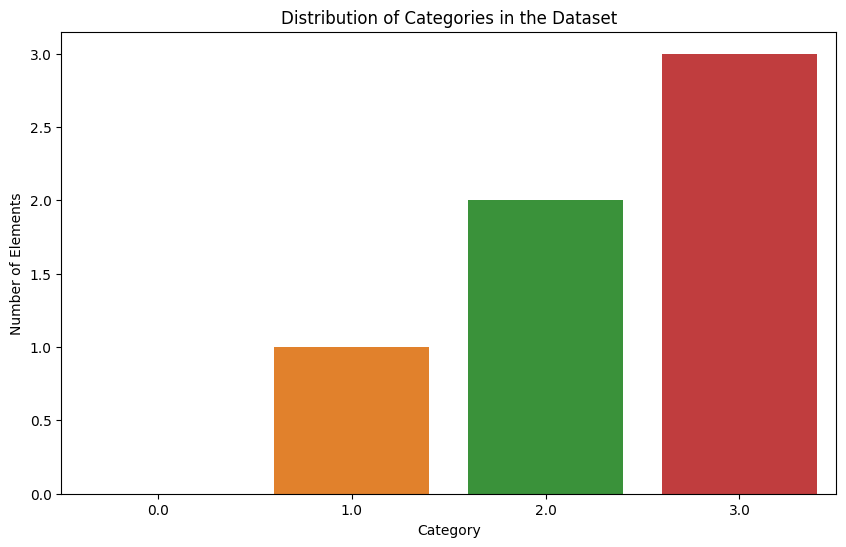

In [18]:
# concat all labels
all_labels = pd.concat([
        test_labels_df,
        train_labels_df,
        validation_labels_df
        ])

plt.figure(figsize=(10, 6))
sns.barplot(data=all_labels, x=all_labels.columns[0], y=all_labels.columns[0], ci=None)

plt.xlabel("Category")
plt.ylabel("Number of Elements")
plt.title("Distribution of Categories in the Dataset")
plt.show()


## e)Perform the following steps on the tweets in an order of your choosing:
* Tokenize each tweet into words.
* If you think it is useful, use Speller from the autocorrect library to correct spelling mistakes.
* Create a list of stopwords (using publicly available lists and/or adding your own) and remove these.
* Use PorterStemmer or WordNetLemmatizer from nltk.stem on the text.
* Use regular expressions (the re library) to do any additional cleanup of the text you wish to do.


In [24]:
# initstopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
spell = Speller(lang='en')

In [35]:
def tokenize(text):
    tokenized_text = word_tokenize(text)
    return tokenized_text

def correct_spelling(tokenized_text):
    return [spell(word) for word in tokenized_text]

def remove_stopwords(tokenized_text):
    return [word for word in tokenized_text if word.lower() not in stop_words]

def lemmatize_text(tokenized_text):
    return [lemmatizer.lemmatize(word) for word in tokenized_text]

def apply_regex(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

In [37]:
test_df['tokenized_text'] = test_df['text'].apply(tokenize)

print(test_df[['tokenized_text']])

                                         tokenized_text
0     [You, must, be, knowing, #, blithe, means, (, ...
1     [Old, saying, ', A, #, smile, shared, is, one,...
2     [Bridget, Jones, ', Baby, was, bloody, hilario...
3     [@, Elaminova, sparkling, water, makes, your, ...
4     [I, 'm, tired, of, everybody, telling, me, to,...
...                                                 ...
3137  [Why, does, Candice, constantly, pout, #, GBBO...
3138  [@, redBus_in, #, unhappy, with, #, redbus, CC...
3139  [@, AceOperative789, no, pull, him, afew, week...
3140  [I, 'm, buying, art, supplies, and, I, 'm, deb...
3141  [@, sainsburys, Could, you, ask, your, Chaffor...

[3142 rows x 1 columns]


In [1]:
# takes so long to run
test_df['corrected_text'] = test_df['tokenized_text'].apply(correct_spelling)
print(test_df[['corrected_text']])

NameError: ignored

In [ ]:
test_df['text_without_stopwords'] = test_df['tokenized_text'].apply(remove_stopwords)
print(test_df[['text_without_stopwords']])

In [ ]:
test_df['lemmatized_text'] = test_df['tokenized_text'].apply(lemmatize_text)
print(test_df[['lemmatized_text']])

pre processing test_df

In [38]:
train_df['corrected_text'] = train_df['tokenized_text'].apply(correct_spelling)

train_df['text_without_stopwords'] = train_df['tokenized_text'].apply(remove_stopwords)

train_df['lemmatized_text'] = train_df['tokenized_text'].apply(lemmatize_text)

train_df['cleaned_text'] = train_df['tokenized_text'].apply(apply_regex)

print(train_df[['text', 'tokenized_text', 'corrected_text', 'text_without_stopwords', 'lemmatized_text', 'cleaned_text'])


                                         tokenized_text
0     [Just, got, back, from, seeing, @, GaryDelaney...
1     [Oh, dear, an, evening, of, absolute, hilarity...
2     [Been, waiting, all, week, for, this, game, ❤️...
3     [@, gardiner_love, :, Thank, you, so, much, ,,...
4     [I, feel, so, blessed, to, work, with, the, fa...
...                                                 ...
3608  [@, VivienLloyd, Thank, you, so, much, !, Just...
3609       [Just, put, the, winter, duvet, on, ☃️❄️🌬☔️]
3610  [@, SilkInSide, @, TommyJoeRatliff, that, 's, ...
3611  [@, BluesfestByron, second, artist, announceme...
3612  [I, can, literally, eat, creamy, pesto, pasta,...

[3613 rows x 1 columns]


In [39]:
val_df['corrected_text'] = val_df['tokenized_text'].apply(correct_spelling)

val_df['text_without_stopwords'] = val_df['tokenized_text'].apply(remove_stopwords)

val_df['lemmatized_text'] = val_df['tokenized_text'].apply(lemmatize_text)

val_df['cleaned_text'] = val_df['tokenized_text'].apply(apply_regex)

print(val_df[['text', 'tokenized_text', 'corrected_text', 'text_without_stopwords', 'lemmatized_text', 'cleaned_text'])


                                        tokenized_text
0    [@, theclobra, lol, I, thought, maybe, ,, coul...
1    [Nawaz, Sharif, is, getting, more, funnier, th...
2    [Nawaz, Sharif, is, getting, more, funnier, th...
3    [@, tomderivan73, 😁, ..., I, 'll, just, people...
4    [I, love, my, family, so, much, #, lucky, #, g...
..                                                 ...
342  [Common, app, just, randomly, logged, me, out,...
343  [I, 'd, rather, laugh, with, the, rarest, geni...
344  [If, you, #, invest, in, my, new, #, film, I, ...
345  [Just, watched, Django, Unchained, ,, Other, p...
346  [@, KeithOlbermann, depressing, how, despicabl...

[347 rows x 1 columns]


## f)Print out the words in the first five processed tweets along with their labels. (Viewing this may give you additional ideas for the previous steps.)

In [ ]:

print(" ------------------------First five processed tweets in test_df:")
print(test_df[['label', 'cleaned_text']].head(5))

print("------------------------First five processed tweets in train_df:")
print(train_df[['label', 'cleaned_text']].head(5))

print("------------------------First five processed tweets in val_df:")
print(val_df[['label', 'cleaned_text']].head(5))



# Modeling


## a) Create and compile a model using tf.keras.Sequential to predict the emotion label from the text. Start with an embedding layer and build an architecture from dense, LSTM, GRU, bidirectional LSTM or GRU, and dropout layers. Compile the model using a choice of optimizer, sparse_binary_crossentropy for the loss, and the metric set to accuracy.


In [ ]:
max_sequence_length = max(len(sentence.split()) for sentence in df['text'])
print("Max seq len:", max_sequence_length)

In [ ]:
model = Sequential()

embedding_dim = 128
input_dim = 10000
model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_sequence_length))

model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

model.add(Dropout(0.5))

num_classes = 4
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.summary()


## b) Train the model on the training data without using a validation split. Calculate and record the training accuracy.


## c) Use the model to make predictions on the validation data. Calculate and record the validation accuracy. Display the confusion matrix for the validation data. Use markdown to make comments.


## d) Revisit the previous steps to make at least three models in total by changing architecture and hyperparameters.


## e) Present neatly the training and validation accuracy along with the validation confusion matrix for each model.

# Discussion


## a) Comment on the relative merits of each model. Select the best model based on quantitative metrics and plots. Use markdown to explain why you feel this is the best model.


## b) Make predictions on the testing data; calculate the testing accuracy and display the confusion matrix for test data.


## c) Use markdown to describe how well you feel your model will work to classify the emotional connotation of a tweet. Provide a quantitative measure of accuracy and describe an shortcomings of the model.